# Understanding Descriptive Statistics

Import the necessary libraries here:

In [85]:
# Libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
plt.style.use('seaborn')

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [90]:
# your code here

def rolling(x):
    dice_results=[y for y in range(1,7)]
    list_results=[random.choices(dice_results) for u in range(x)]
    
    return [y for x in list_results for y in x]

df=pd.DataFrame({'Result': rolling (10)})
df



,Result
0,3
1,5
2,1
3,5
4,2
5,2
6,3
7,5
8,6
9,5


#### 2.- Plot the results sorted by value.

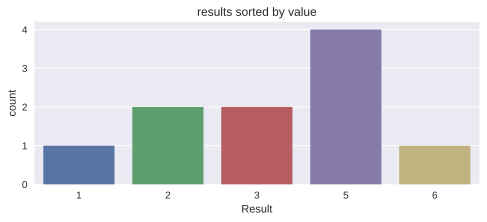

In [91]:
fig = plt.figure(figsize=(8, 3))
ax= sns.countplot(df['Result'])
ax.set(title='results sorted by value')
plt.show()




#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

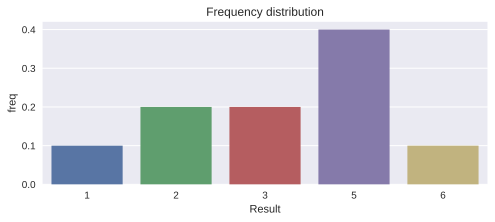

In [92]:
# your code here

dfreq=df.groupby('Result').size().reset_index()
dfreq['freq'] = dfreq.apply(lambda new: new[0]/sum(dfreq[0]), axis=1)

fig = plt.figure(figsize=(8, 3))
ax= sns.barplot(dfreq['Result'],dfreq['freq'])
ax.set(title='Frequency distribution')
plt.show()

***

The first plot is the histogram, therefore the number of times of each result.

The second is the number of times of each result divided by the total rolling times.

Besides the plot are the same with different axis Y


***

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [93]:
# your code here

def mean(x):
    return sum(x)/len(x)

mean(df['Result'])


3.7

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [94]:
# your code here
#First, calculate the frequency distribution, i calculated earlier in the DataFrame dfreq.

mean(dfreq[0])


2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [95]:
# your code here

import math

def quantile(data, quantile):
    size = len(data)
    return sorted(data)[int(math.ceil((size * quantile) / 100)) - 1]


quantile(df['Result'], 50)

3

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [96]:
print(quantile(df['Result'], 25))
print(quantile(df['Result'], 50))
print(quantile(df['Result'], 75))



2
3
5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

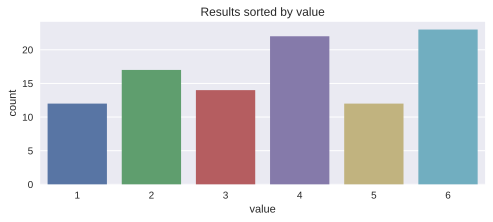

In [100]:
# your code here
df2 = pd.read_csv('../data/roll_the_dice_hundred.csv', low_memory=False)

fig = plt.figure(figsize=(8, 3))
ax= sns.countplot(df2['value'])
ax.set(title='Results sorted by value')
plt.show()



***

The more times you roll the dice, the closer the results get to having all 1/6

***

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [101]:
df2

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [102]:
# your code here

mean(df2['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [103]:
# your code here
dfreq2=df2.groupby('value').size().reset_index()
dfreq2['freq'] = dfreq2.apply(lambda new: new[0]/sum(dfreq2[0]), axis=1)

dfreq2



,value,0,freq
0,1,12,0.12
1,2,17,0.17
2,3,14,0.14
3,4,22,0.22
4,5,12,0.12
5,6,23,0.23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

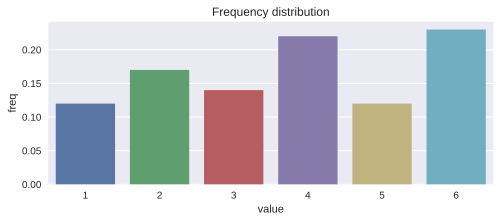

In [107]:
# your code here
fig = plt.figure(figsize=(8, 3))
ax= sns.barplot(dfreq2['value'],dfreq2['freq'])
ax.set(title='Frequency distribution')
plt.show()

"""
your comments here
"""
***

The more times you roll the dice, the closer the results get to having all 1/6 at the median close to 3.5.

***


#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

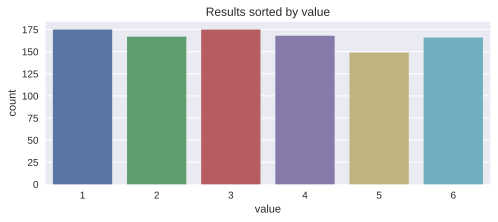

In [108]:
# your code here

df3 = pd.read_csv('../data/roll_the_dice_thousand.csv', low_memory=False)

fig = plt.figure(figsize=(8, 3))
ax= sns.countplot(df3['value'])
ax.set(title='Results sorted by value')
plt.show()



"""
your comments here
"""

***

The more times you roll the dice, the closer the results get to having all 166 counts.

***


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

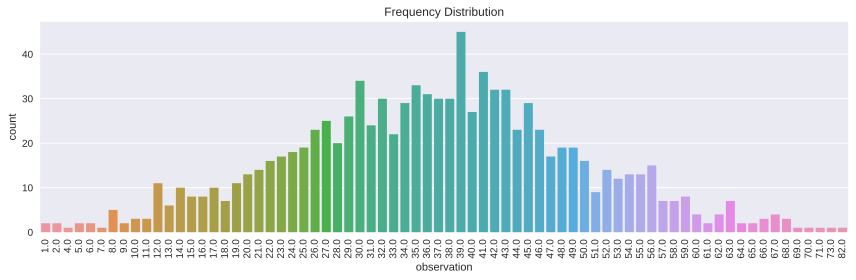

In [128]:
# your code here
dfage = pd.read_csv('../data/ages_population.csv', low_memory=False)

fig = plt.figure(figsize=(12, 4))
ax= sns.countplot(dfage['observation'])
ax.set(title='Frequency Distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [120]:
# your code here
dfage.describe()


,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


"""
your comments here
"""

***

It's easy to guess the mean because the distribution is like a mountain, and the mean in this type of distribution are around the peak of the mountain.

***

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

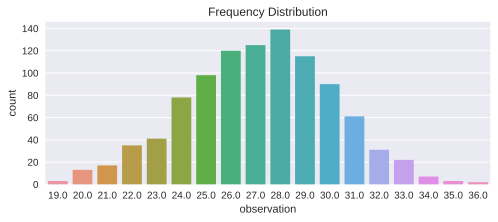

In [124]:
# your code here
dfage2 = pd.read_csv('../data/ages_population2.csv', low_memory=False)

fig = plt.figure(figsize=(8, 3))
ax= sns.countplot(dfage2['observation'])
ax.set(title='Frequency Distribution')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

"""
your comments here
"""

***

This has the same distribution but minimum and the maximum are closer.That is, the range for results is smaller.

***

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [130]:
# your code here

dfage2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


"""
your comments here
"""
***

The range of the results is smaller than the 'dfage', for that the standard desviation is lower in 'dfage2' than in 'dfage'.

***

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

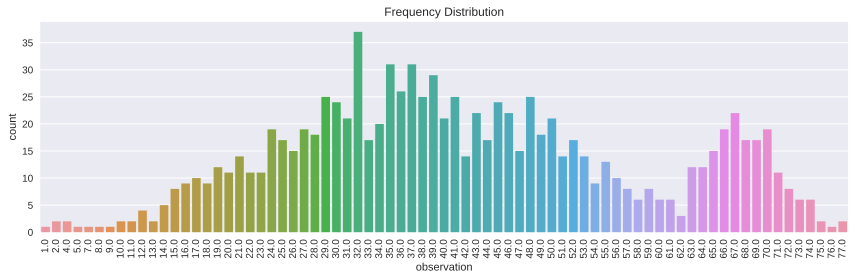

In [134]:
# your code here

dfage3 = pd.read_csv('../data/ages_population3.csv', low_memory=False)

fig = plt.figure(figsize=(12, 4))
ax= sns.countplot(dfage3['observation'])
ax.set(title='Frequency Distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [135]:
# your code here
dfage3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


"""
your comments here
"""

***

Now you have another peak in the 'mountain' this explain that 'dfage3' has higher stardard deviation and also the mean is higher because the second peak is close to the maximum.

***

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [136]:
# your code here

dfage3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


"""
your comments here
"""

***

The second peak of the 'mountain' is between third quartile and the maximum for that the mean and standard desviation are the highest.

***

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [140]:
# your code here

for x in range(0,110,10):
    print(np.percentile(dfage3,x))
    


1.0
22.0
28.0
32.0
36.0
40.0
45.0
50.0
57.0
67.0
77.0


"""
your comments here
"""

***

For example the Percentile 0% is 1 and percentile 10% is 22 instead percentile 90% is 67 and percentile 100% is 77 only 10 points difference.

***

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

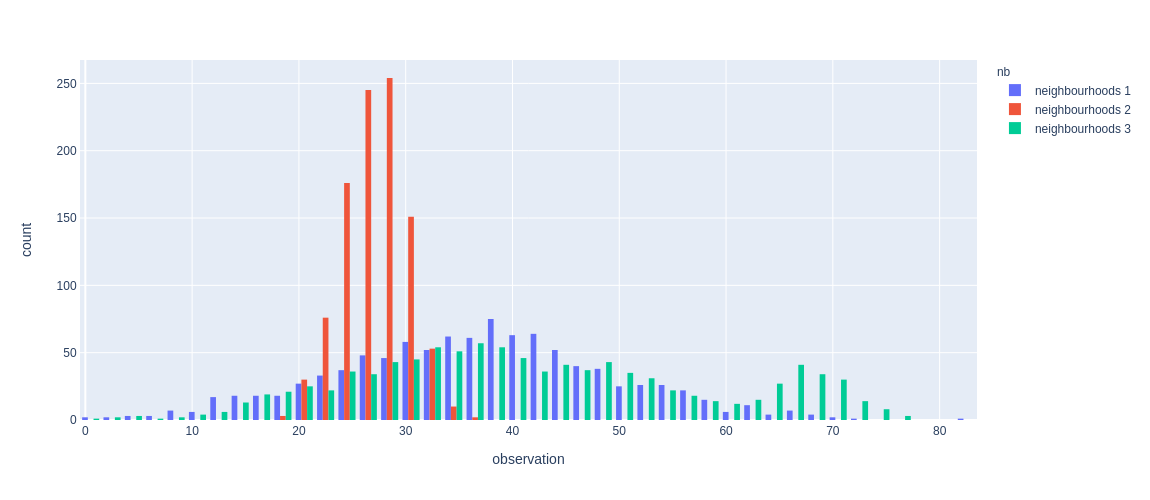

In [150]:
# your code here
import plotly.express as px
dfage['nb']='neighbourhoods 1'
dfage2['nb']='neighbourhoods 2'
dfage3['nb']='neighbourhoods 3'

list_df=[dfage,dfage2,dfage3]

dfage_all = pd.concat(list_df, sort=True)

fig=px.histogram(dfage_all, x='observation',orientation='v',title='',color='nb',
                 barmode='group',width=1000,height=500)
fig.show()

In [ ]:
"""
your comments here
"""